In [121]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [122]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [123]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [124]:
beer_permit = gpd.read_file('data/Beer_Permit_Locations_Feature_Layer_view_5878506617859794089.geojson')
print(beer_permit.crs)
beer_permit.head( )

EPSG:4326


,ObjectId,Permit__,Status,Permit_Type,Permit_Sub_Type,Permit_Subtype_Description,Date_Entered,Date_Issued,Parcel,Business_Name,Business_Owner,Address,City,State,ZIP,Council_Dist,Census_Tract,Lon,Lat,geometry
0,1,00-00507,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,"Mon, 03 Jan 2000 06:00:00 GMT","Wed, 26 Jan 2000 06:00:00 GMT",09115025000,Betty's Grill,Betty Oliver,4900 CHARLOTTE AVE,NASHVILLE,TN,37209,24,37013400,-86.846098,36.152237,POINT (-86.84610 36.15224)
1,2,00-15213,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",14800008700,"Food Lion, LLC","Food Lion, LLC",936 Richards RD,Nashville,TN,37013,28,37015627,-86.681502,36.068126,POINT (-86.68150 36.06813)
2,3,00-15216,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",09700013000,"Food Lion, LLC","Food Lion, LLC",3636 Bell RD,Nashville,TN,37214,13,37015624,-86.627208,36.150747,POINT (-86.62721 36.15075)
3,4,00-17637,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Mon, 31 Jul 2000 05:00:00 GMT","Thu, 14 Sep 2000 05:00:00 GMT",09306100100,Morton's of Chicago- The Steak,Morton's of Chicago/Nashville Inc.,618 Church ST,Nashville,TN,37219,19,37019500,-86.782434,36.162327,POINT (-86.78243 36.16233)
4,5,00-17649,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Tue, 25 Jul 2000 05:00:00 GMT","Fri, 06 Oct 2000 05:00:00 GMT",07500020000,Chili's Grill & Bar,Chili's Inc.,5005 Old Hickory BLVD,Hermitage,TN,37076,14,37015404,-86.620061,36.194951,POINT (-86.62006 36.19495)


#### Now let's look at the difference between calling the first geometry variable.....


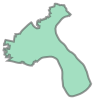

In [125]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [126]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


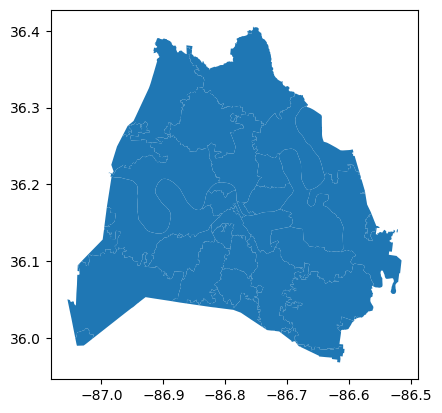

In [127]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


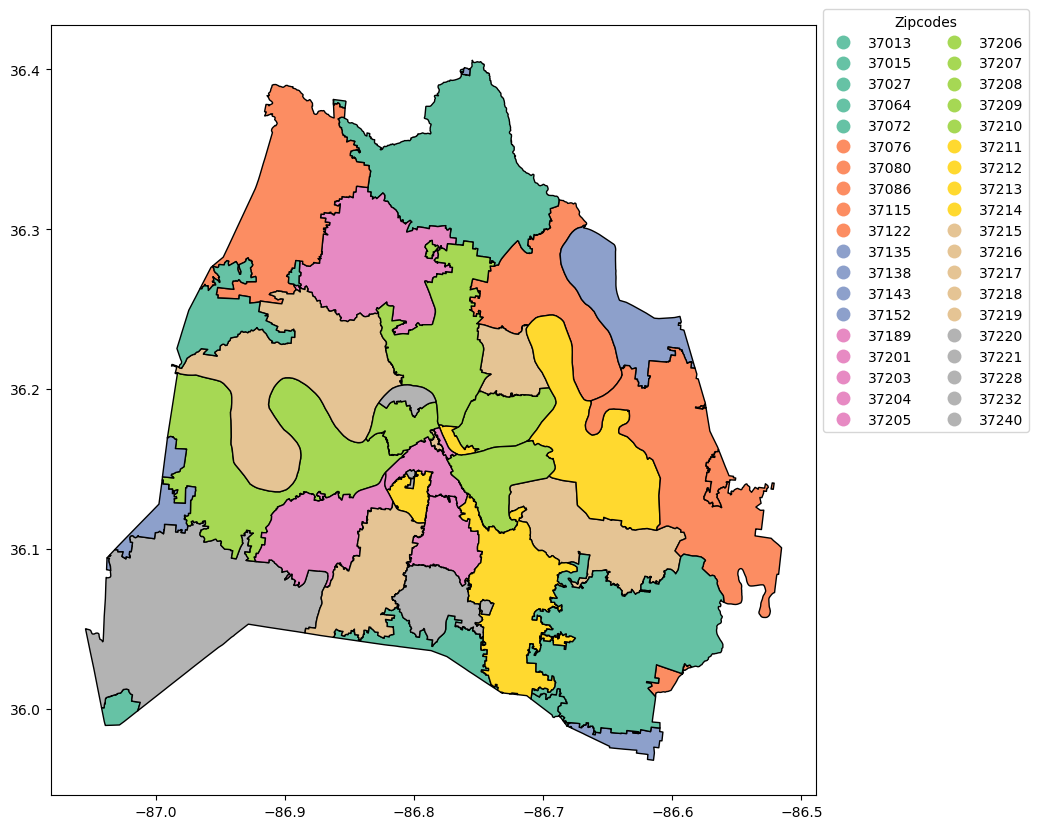

In [128]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [129]:
print(beer_permit.shape)
beer_permit.head(3)

(2031, 20)


,ObjectId,Permit__,Status,Permit_Type,Permit_Sub_Type,Permit_Subtype_Description,Date_Entered,Date_Issued,Parcel,Business_Name,Business_Owner,Address,City,State,ZIP,Council_Dist,Census_Tract,Lon,Lat,geometry
0,1,00-00507,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,"Mon, 03 Jan 2000 06:00:00 GMT","Wed, 26 Jan 2000 06:00:00 GMT",09115025000,Betty's Grill,Betty Oliver,4900 CHARLOTTE AVE,NASHVILLE,TN,37209,24,37013400,-86.846098,36.152237,POINT (-86.84610 36.15224)
1,2,00-15213,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",14800008700,"Food Lion, LLC","Food Lion, LLC",936 Richards RD,Nashville,TN,37013,28,37015627,-86.681502,36.068126,POINT (-86.68150 36.06813)
2,3,00-15216,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",09700013000,"Food Lion, LLC","Food Lion, LLC",3636 Bell RD,Nashville,TN,37214,13,37015624,-86.627208,36.150747,POINT (-86.62721 36.15075)


In [130]:
beer_permit.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ObjectId                    2031 non-null   int64   
 1   Permit__                    2031 non-null   object  
 2   Status                      2031 non-null   object  
 3   Permit_Type                 2031 non-null   object  
 4   Permit_Sub_Type             2031 non-null   object  
 5   Permit_Subtype_Description  2031 non-null   object  
 6   Date_Entered                2031 non-null   object  
 7   Date_Issued                 1977 non-null   object  
 8   Parcel                      2031 non-null   object  
 9   Business_Name               2031 non-null   object  
 10  Business_Owner              1058 non-null   object  
 11  Address                     2031 non-null   object  
 12  City                        2031 non-null   object  
 13  State     

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [131]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [132]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [133]:
beer_permit_per_zip = gpd.sjoin(beer_permit, zipcodes, predicate = 'within')

In [134]:
beer_permit_per_zip.head()

,ObjectId,Permit__,Status,Permit_Type,Permit_Sub_Type,Permit_Subtype_Description,Date_Entered,Date_Issued,Parcel,Business_Name,...,State,ZIP,Council_Dist,Census_Tract,Lon,Lat,geometry,index_right,zip,po_name
0,1,00-00507,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,"Mon, 03 Jan 2000 06:00:00 GMT","Wed, 26 Jan 2000 06:00:00 GMT",09115025000,Betty's Grill,...,TN,37209,24,37013400,-86.846098,36.152237,POINT (-86.84610 36.15224),12,37209,NASHVILLE
1,2,00-15213,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",14800008700,"Food Lion, LLC",...,TN,37013,28,37015627,-86.681502,36.068126,POINT (-86.68150 36.06813),51,37013,ANTIOCH
2,3,00-15216,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,"Wed, 26 Apr 2000 05:00:00 GMT","Fri, 30 Jun 2000 05:00:00 GMT",09700013000,"Food Lion, LLC",...,TN,37214,13,37015624,-86.627208,36.150747,POINT (-86.62721 36.15075),37,37214,NASHVILLE
3,4,00-17637,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Mon, 31 Jul 2000 05:00:00 GMT","Thu, 14 Sep 2000 05:00:00 GMT",09306100100,Morton's of Chicago- The Steak,...,TN,37219,19,37019500,-86.782434,36.162327,POINT (-86.78243 36.16233),24,37219,NASHVILLE
4,5,00-17649,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Tue, 25 Jul 2000 05:00:00 GMT","Fri, 06 Oct 2000 05:00:00 GMT",07500020000,Chili's Grill & Bar,...,TN,37076,14,37015404,-86.620061,36.194951,POINT (-86.62006 36.19495),46,37076,HERMITAGE


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [135]:
beer_permit_per_zip['zip'].value_counts()

zip
37203    307
37214    212
37211    170
37209    152
37206    127
37013    100
37201     94
37207     91
37115     79
37217     74
37076     66
37208     64
37221     63
37210     54
37204     46
37215     46
37216     41
37219     39
37205     36
37212     35
37027     28
37138     27
37218     22
37080     13
37213     13
37072      8
37228      7
37189      7
37220      3
37135      2
37232      2
37240      2
37086      1
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [136]:
beer_in_37221 = beer_permit_per_zip.loc[beer_permit_per_zip['zip'] == '37221']
beer_in_37221.shape

(63, 23)

In [137]:
polygon37221 = zipcodes.loc[zipcodes['zip'] == '37221']
polygon37221.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

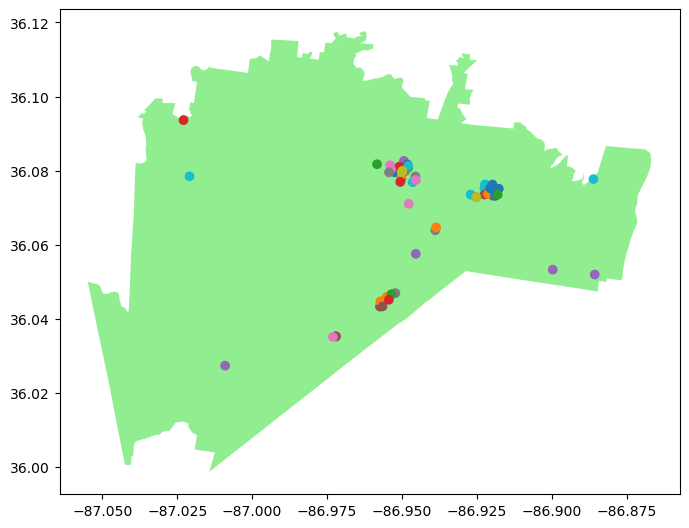

In [138]:
#fig, ax = matplotlib.subplots()
ax = polygon37221.plot(figsize = (8, 10), color = 'lightgreen')
beer_in_37221.plot( ax = ax, column = 'Business_Name');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [139]:
polygon37221.geometry.centroid

C:\Users\Sean\AppData\Local\Temp\ipykernel_25644\2297672768.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37221.geometry.centroid


7    POINT (-86.97531 36.06283)
dtype: geometry

In [140]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37221.geometry.centroid[7]
print(center)

POINT (-86.97531387608755 36.06283153351842)


C:\Users\Sean\AppData\Local\Temp\ipykernel_25644\2138661059.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37221.geometry.centroid[7]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [141]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.06283153351842, -86.97531387608755]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [142]:
#create our map of Nashville Zip Code 37207 and show it
map_37221 = folium.Map(location =  area_center, zoom_start = 12)
map_37221

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [143]:
i = 0
for row_index, row_values in beer_in_37221.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 16
values are:
 
ObjectId                                                    17
Permit__                                              02-15712
Status                                                  ISSUED
Permit_Type                                           BBPERMIT
Permit_Sub_Type                                       OFFSALES
Permit_Subtype_Description                 BB - Off Site Sales
Date_Entered                     Wed, 09 Oct 2002 05:00:00 GMT
Date_Issued                      Mon, 25 Nov 2002 06:00:00 GMT
Parcel                                             14200029900
Business_Name                                           Publix
Business_Owner                           Publix Tennessee, LLC
Address                                   7604  Highway 70  S 
City                                                 Nashville
State                                                       TN
ZIP                                                      37221
Council_Dist                 

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [144]:
#draw our zip code area: 37207
map_37221 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37221).add_to(map_37221)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in beer_in_37221.iterrows():
    loc = [row_values['geometry'].y, row_values['geometry'].x]
    pop = str(row_values['Business_Name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37221)
map_37221.save('maps/map37221.html')

#display our map
map_37221

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [145]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [152]:
cluster_map_37221 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37221)

folium.GeoJson(polygon37221).add_to(cluster_map_37221)

# inside the loop add each marker to the cluster
for row_index, row_values in beer_in_37221.iterrows():
    loc = [row_values['geometry'].y, row_values['geometry'].x]
    pop = str(row_values['Business_Name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37221.save('maps/cluster37221.html')

cluster_map_37221  

In [155]:
locations = beer_in_37221[row_values['geometry']].values.tolist()

KeyError: <POINT (-86.918 36.074)>

In [153]:
#draw our zip code area: 37207
map_37221 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37221).add_to(map_37221)

#create a list of locations and pass them to FastMarkerCluster()
locations = beer_in_37221[row_values['geometry'].y, row_values['geometry'].x].values.tolist()
map_37221.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37221

KeyError: (36.0735236100001, -86.91805003)